In [1]:
import pandas as pd
import numpy as np
import streamlit as st
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
data_recipe_details = pd.read_csv("CulinaryDB/01_Recipe_Details.csv")
data_ingredients = pd.read_csv("CulinaryDB/02_Ingredients.csv")
data_compound_ingredients = pd.read_csv("CulinaryDB/03_Compound_Ingredients.csv")
data_recipe_ingredients = pd.read_csv("CulinaryDB/04_Recipe-Ingredients_Aliases.csv")

In [3]:
# Updating column name 
data_compound_ingredients.rename(columns= {'entity_id': 'Entity ID'}, inplace= True)

In [4]:
italian_cuisine = data_recipe_details[data_recipe_details['Cuisine'] == 'Indian Subcontinent']
italian_cuisine.drop(columns= ['Source'], inplace= True)
italian_cuisine.head()

C:\Users\keera\AppData\Local\Temp\ipykernel_31356\3266213975.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  italian_cuisine.drop(columns= ['Source'], inplace= True)


,Recipe ID,Title,Cuisine
0,1,5 spice vegetable fried rice,Indian Subcontinent
1,2,aachar aaloo,Indian Subcontinent
2,3,aadu lassan keri nu athanu,Indian Subcontinent
3,4,aaloo kofta,Indian Subcontinent
4,5,aaloo tamatar subzi,Indian Subcontinent


In [5]:
italian_cuisine['Title']

0                             5 spice vegetable fried rice
1                                             aachar aaloo
2                               aadu lassan keri nu athanu
3                                              aaloo kofta
4                                      aaloo tamatar subzi
                               ...                        
36329    Chicken Curry with Green Apple and Coconut Chu...
36330                              Clarified Indian Butter
36331                        Homemade Herbed Paneer Cheese
36332                                    Indian Baked Rice
36333                                    Salted Mint Lassi
Name: Title, Length: 4058, dtype: object

In [6]:
data_recipe_merge = pd.merge(italian_cuisine, data_recipe_ingredients, on='Recipe ID')
data_recipe_merge.drop(columns= ['Original Ingredient Name', 'Aliased Ingredient Name'], inplace= True)
data_recipe_merge.head()

,Recipe ID,Title,Cuisine,Entity ID
0,1,5 spice vegetable fried rice,Indian Subcontinent,362
1,1,5 spice vegetable fried rice,Indian Subcontinent,362
2,1,5 spice vegetable fried rice,Indian Subcontinent,291
3,1,5 spice vegetable fried rice,Indian Subcontinent,426
4,2,aachar aaloo,Indian Subcontinent,61


In [7]:
test = pd.merge(data_recipe_merge, data_ingredients, on='Entity ID')
test.drop(columns= ['Ingredient Synonyms', 'Category'], inplace= True)
test.head()

,Recipe ID,Title,Cuisine,Entity ID,Aliased Ingredient Name
0,1,5 spice vegetable fried rice,Indian Subcontinent,362,Capsicum
1,1,5 spice vegetable fried rice,Indian Subcontinent,362,Capsicum
2,1,5 spice vegetable fried rice,Indian Subcontinent,291,Soybean Sauce
3,1,5 spice vegetable fried rice,Indian Subcontinent,426,Sunflower
4,2,aachar aaloo,Indian Subcontinent,61,Buttermilk


In [8]:
df_encoded = pd.get_dummies(test, columns=['Aliased Ingredient Name'], prefix='', prefix_sep='')
df_encoded.head()

,Recipe ID,Title,Cuisine,Entity ID,Allspice,Almond,Amaranth,American pokeweed,Anise,Apple,...,White Wine,Wholewheat Bread,Wild duck,Wine,Winter squash,Wonton wrapper,Yam,Yeast,Yogurt,Zucchini
0,1,5 spice vegetable fried rice,Indian Subcontinent,362,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,5 spice vegetable fried rice,Indian Subcontinent,362,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,5 spice vegetable fried rice,Indian Subcontinent,291,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1,5 spice vegetable fried rice,Indian Subcontinent,426,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2,aachar aaloo,Indian Subcontinent,61,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
df_grouped = df_encoded.groupby(['Recipe ID', 'Title', 'Cuisine'], as_index=False).sum()
df_grouped.drop(columns= ['Entity ID', 'Cuisine'], inplace= True)
df_grouped.head()

,Recipe ID,Title,Allspice,Almond,Amaranth,American pokeweed,Anise,Apple,Apple Cider Vinegar,Apple Juice,...,White Wine,Wholewheat Bread,Wild duck,Wine,Winter squash,Wonton wrapper,Yam,Yeast,Yogurt,Zucchini
0,1,5 spice vegetable fried rice,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,aachar aaloo,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,aadu lassan keri nu athanu,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,aaloo kofta,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,aaloo tamatar subzi,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
df_grouped.shape

(4054, 321)

# EDA

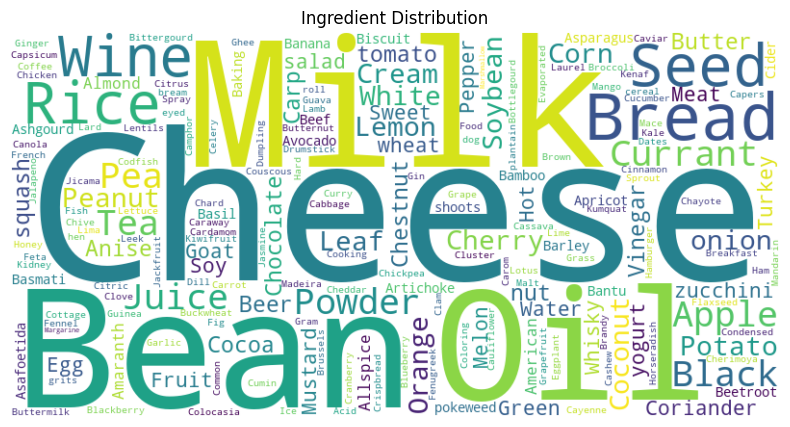

In [11]:
# WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df_grouped.columns[2:]))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Ingredient Distribution')
plt.show()

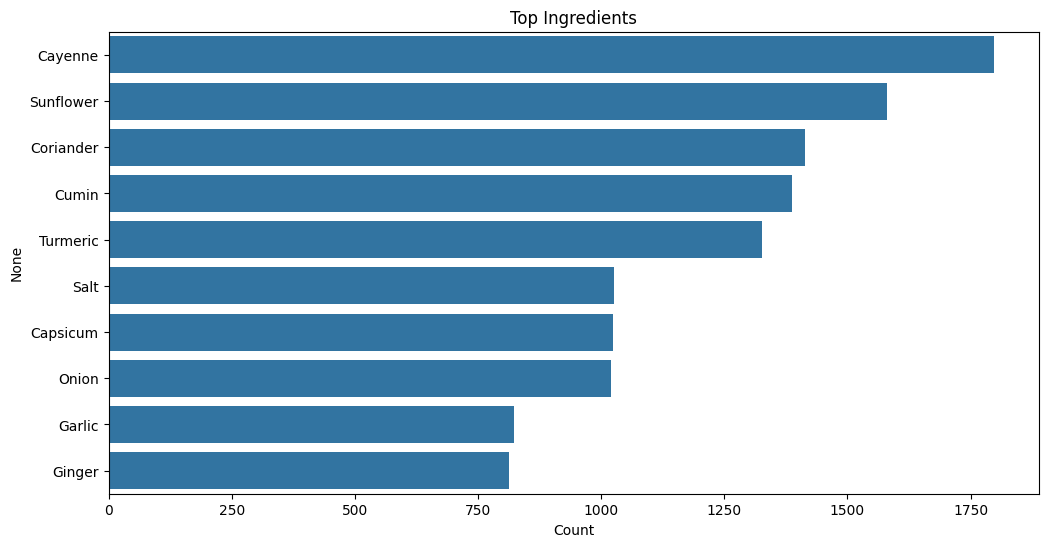

In [12]:
# Top Ingredients
top_ingredients = df_grouped.iloc[:, 2:].sum().sort_values(ascending=False)[:10]
plt.figure(figsize=(12, 6))
sns.barplot(x=top_ingredients.values, y=top_ingredients.index)
plt.title('Top Ingredients')
plt.xlabel('Count')
plt.show()

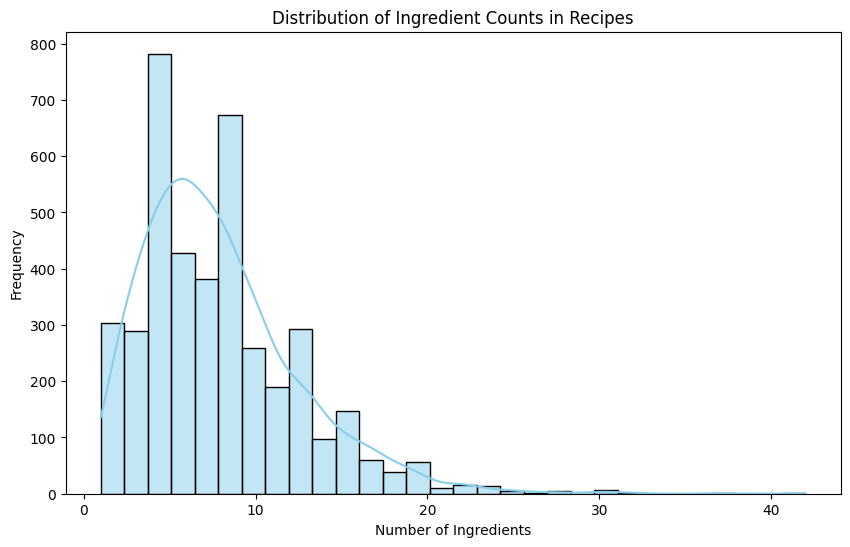

In [13]:
# Recipe Ingredient Counts
ingredient_counts = df_grouped.iloc[:, 2:].sum(axis=1)
plt.figure(figsize=(10, 6))
sns.histplot(ingredient_counts, bins=30, kde=True, color='skyblue')
plt.title('Distribution of Ingredient Counts in Recipes')
plt.xlabel('Number of Ingredients')
plt.ylabel('Frequency')
plt.show()

In [14]:
df_grouped.sum()

Recipe ID                                                  27165918
Title             5 spice vegetable fried riceaachar aalooaadu l...
Allspice                                                         20
Almond                                                          164
Amaranth                                                          2
                                        ...                        
Wonton wrapper                                                    3
Yam                                                              22
Yeast                                                            36
Yogurt                                                          350
Zucchini                                                         24
Length: 321, dtype: object

In [15]:
# Calculate the sum of each ingredient column
ingredient_sums = df_grouped.iloc[:, 2:].sum()

# Identify columns to keep (sum >= 10)
columns_to_keep = ingredient_sums[ingredient_sums >= 10].index

# Filter the DataFrame to keep only relevant columns
df_filtered = df_grouped[['Recipe ID', 'Title'] + list(columns_to_keep)]

# Identify rows to keep (sum of ingredients in selected columns > 0)
rows_to_keep = df_filtered[df_filtered.iloc[:, 2:].sum(axis=1) > 5]

# Display the filtered DataFrame
rows_to_keep.reset_index(inplace= True, drop= True)

In [16]:
rows_to_keep

,Recipe ID,Title,Allspice,Almond,Anise,Apple,Apple Cider Vinegar,Apricot,Asafoetida,Baking Powder,...,Walnut,Water,Welsh onion,Wheat,White Pepper,White Wine,Yam,Yeast,Yogurt,Zucchini
0,2,aachar aaloo,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,aadu lassan keri nu athanu,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,4,aaloo kofta,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6,aalu dum,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7,aam aur chane ka achaar,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2631,36327,Spiced Mango Lassi,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2632,36328,Tandoori-Style Grilled Chicken,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2633,36329,Cilantro Mint Chutney,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2634,36330,Chicken Curry with Green Apple and Coconut Chu...,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [17]:
rows_to_keep.to_csv("Indian_Subcontinent_db.csv", index= False)

In [18]:
# Convert the DataFrame to JSON
json_data = rows_to_keep.to_json(orient='records', lines=True)

# Write the JSON data to a file
with open('recipes.json', 'w') as json_file:
    json_file.write(json_data)

# Recommender

In [19]:
# import pandas as pd
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

# Select only the columns with ingredients
ingredient_columns = rows_to_keep.columns[2:]

# Create a binary matrix (0 or 1) from the ingredient columns
binary_matrix = rows_to_keep[ingredient_columns].values

# Apply PCA for dimensionality reduction
n_components = 50  # Adjust as needed
pca = PCA(n_components= n_components)
reduced_matrix = pca.fit_transform(binary_matrix)

# Compute cosine similarity on the reduced matrix
similarities = cosine_similarity(reduced_matrix)

# Function to get recipe recommendations based on ingredients
def get_recommendations(recipe_id, df= rows_to_keep, similarities=similarities):
    # Get the index of the specified recipe
    idx = df.index[df['Recipe ID'] == recipe_id].tolist()[0]

    # Get similarity scores for the specified recipe
    recipe_similarities = similarities[idx]

    # Create a DataFrame with Recipe ID, title, and corresponding similarity scores
    sim_df = pd.DataFrame({
        'Recipe ID': df['Recipe ID'],
        'Title': df['Title'],
        'Similarity': recipe_similarities
    })

    # Sort by similarity in descending order
    sim_df = sim_df.sort_values(by='Similarity', ascending=False)

    # Exclude the recipe itself and get top 10 similar recipes
    recommendations = sim_df[sim_df['Recipe ID'] != recipe_id].head(10)

    return recommendations[['Recipe ID', 'Title']]

In [20]:
# Example: Get recommendations for a specific recipe (e.g., Recipe ID 9319)
recommendations = get_recommendations(1500)
print(recommendations)

      Recipe ID                                 Title
581        1131                        lauki ka halwa
79          141                           badam kheer
376         739                        gajar ka halwa
871        1613                        paneer chandni
1245       2325                       subz shahjahani
441         868                    herbal apple kheer
1302       2437                        thandi thandai
1167       2170            south indian akkaravadisal
1088       2030                          rice payasam
745        1400  moogar puran poli with panneer rabdi


In [21]:
def evaluate_accuracy():
    total_accuracy = 0
    num_queries = 0

    for recipe_id in rows_to_keep['Recipe ID'].unique():
        actual_ingredients = rows_to_keep[rows_to_keep['Recipe ID'] == recipe_id][ingredient_columns].values.flatten()
        recommended_recipes = get_recommendations(recipe_id)['Recipe ID'].tolist()

        # Ensure both arrays have the same size
        if len(recommended_recipes) > len(actual_ingredients):
            recommended_recipes = recommended_recipes[:len(actual_ingredients)]
        elif len(recommended_recipes) < len(actual_ingredients):
            actual_ingredients = actual_ingredients[:len(recommended_recipes)]

        if len(recommended_recipes) > 0:
            actual_vector = actual_ingredients.reshape(1, -1)
            
            # Filter the DataFrame to include only recommended recipes
            recommended_df = rows_to_keep[rows_to_keep['Recipe ID'].isin(recommended_recipes)]
            
            # Ensure both matrices have the same number of columns
            if actual_vector.shape[1] != recommended_df[ingredient_columns].shape[1]:
                continue  # Skip if dimensions don't match

            # Compute cosine similarity
            similarity_scores = cosine_similarity(actual_vector, recommended_df[ingredient_columns])
            
            # Extract the similarity score for the specific recipe
            average_similarity = similarity_scores[0].mean()

            total_accuracy += average_similarity
            num_queries += 1

    avg_accuracy = total_accuracy / num_queries if num_queries > 0 else 0
    return avg_accuracy

In [22]:
accuracy = evaluate_accuracy()
print(f'Average Cosine Similarity (Accuracy): {accuracy}')

Average Cosine Similarity (Accuracy): 0
